In [1]:
import pandas as pd
from sodapy import Socrata

In [2]:
client = Socrata('data.cityofnewyork.us',
                 'BKagDL8jmsAK9QhB9PoS22K05',
                 username="dlm6693@gmail.com",
                 password="*Verboten1*")

In [4]:
_2014 = client.get("gkne-dk5s", limit=100000)
df_2014 = pd.DataFrame.from_records(_2014)

In [5]:
df_2014.head()

,dropoff_datetime,dropoff_latitude,dropoff_longitude,fare_amount,imp_surcharge,mta_tax,passenger_count,payment_type,pickup_datetime,pickup_latitude,pickup_longitude,rate_code,store_and_fwd_flag,tip_amount,tolls_amount,total_amount,trip_distance,vendor_id
0,2014-11-17T09:23:00.000,40.749471999999997,-74.004257999999993,11.5,0,0.5,1,CRD,2014-11-17T09:11:00.000,40.722447000000003,-73.997045,1,NaN,2,0,14,2.5800000000000001,VTS
1,2014-08-21T12:27:36.000,0,0,9,0,0.5,1,CSH,2014-08-21T12:17:09.000,0,0,1,N,0,0,9.5,1.5,CMT
2,2014-02-27T02:52:00.000,40.741337000000001,-74.004059999999996,10.5,0.5,0.5,1,CSH,2014-02-27T02:43:00.000,40.767155000000002,-73.995632999999998,1,NaN,0,0,11.5,2.4700000000000002,VTS
3,2014-07-30T17:35:00.000,40.776269999999997,-73.947737000000004,12.5,1,0.5,1,CSH,2014-07-30T17:20:00.000,40.767164999999999,-73.983168000000006,1,NaN,0,0,14,2.8900000000000001,VTS
4,2014-06-09T13:37:39.000,40.750438000000003,-73.991573000000002,16,0,0.5,1,CRD,2014-06-09T13:13:26.000,40.774476999999997,-73.963832999999994,1,N,0,0,16.5,2.6000000000000001,CMT


In [6]:
_2015 = client.get("2yzn-sicd", limit=100000)
df_2015 = pd.DataFrame.from_records(_2015)

In [7]:
df_2015.head()

,dropoff_datetime,dropoff_latitude,dropoff_longitude,extra,fare_amount,mta_tax,passenger_count,payment_type,pickup_datetime,pickup_latitude,pickup_longitude,rate_code,store_and_fwd_flag,tip_amount,tolls_amount,total_amount,trip_distance,vendor_id
0,2015-03-02T08:41:33.000,40.754978179931641,-73.974334716796875,0,21.5,0.5,1,1,2015-03-02T08:20:02.000,40.707408905029297,-74.017158508300781,1,N,4.45,0,26.75,6.1,1
1,2015-01-26T07:13:06.000,40.765113830566406,-73.982109069824219,0,5.5,0.5,1,1,2015-01-26T07:08:41.000,40.779911041259766,-73.977043151855469,1,N,1.25,0,7.55,1.1,1
2,2015-05-17T15:18:41.000,40.771308898925781,-73.965721130371094,0,8.5,0.5,1,1,2015-05-17T15:09:46.000,40.748706817626953,-73.979934692382813,1,N,2.79,0,12.09,1.87,2
3,2015-02-07T10:21:03.000,40.726711273193359,-73.992691040039063,0,5,0.5,2,1,2015-02-07T10:17:33.000,40.735588073730469,-73.982536315917969,1,N,1.2,0,7,0.9,1
4,2015-02-27T17:49:48.000,40.731475830078125,-74.002212524414063,1,21,0.5,1,1,2015-02-27T17:21:58.000,40.758155822753906,-73.962806701660156,1,N,4.55,0,27.35,4.7,1


In [17]:
df_2015.columns[df_2015.columns!= df_2014.columns]

Index(['extra', 'fare_amount'], dtype='object')

In [18]:
df_2014.columns[df_2014.columns!= df_2015.columns]

Index(['fare_amount', 'extra'], dtype='object')

In [15]:
df_2015.extra.value_counts(), df_2014.imp_surcharge.value_counts()

(0       51599
 0.5     34003
 1       14384
 -0.5       10
 -1          2
 0.01        1
 1.5         1
 Name: extra, dtype: int64, 0      50902
 0.5    34818
 1      14275
 1.5        3
 2          1
 2.5        1
 Name: imp_surcharge, dtype: int64)

In [16]:
df_2014 = df_2014.rename(columns={'imp_surcharge':'extra', 'fare_amount':'fare_amount'})

In [41]:
_2016 = client.get("uacg-pexx", limit=99999)

# Convert to pandas DataFrame
df_2016 = pd.DataFrame.from_records(_2016)

In [60]:
df_2016.head()
df_2016.improvement_surcharge.value_counts()

0.3     99948
-0.3       37
0          14
Name: improvement_surcharge, dtype: int64

In [43]:
len(df_2016.columns), len(df_2015.columns)

(19, 18)

In [48]:
import numpy as np
np.setdiff1d(df_2015.columns, df_2016.columns)

array([], dtype=object)

In [45]:
df_2016.columns

Index(['dropoff_latitude', 'dropoff_longitude', 'extra', 'fare_amount',
       'improvement_surcharge', 'mta_tax', 'passenger_count', 'payment_type',
       'pickup_latitude', 'pickup_longitude', 'ratecodeid',
       'store_and_fwd_flag', 'tip_amount', 'tolls_amount', 'total_amount',
       'tpep_dropoff_datetime', 'tpep_pickup_datetime', 'trip_distance',
       'vendorid'],
      dtype='object')

In [46]:
df_2015.columns

Index(['dropoff_datetime', 'dropoff_latitude', 'dropoff_longitude', 'extra',
       'fare_amount', 'mta_tax', 'passenger_count', 'payment_type',
       'pickup_datetime', 'pickup_latitude', 'pickup_longitude', 'rate_code',
       'store_and_fwd_flag', 'tip_amount', 'tolls_amount', 'total_amount',
       'trip_distance', 'vendor_id'],
      dtype='object')

In [47]:
df_2016 = df_2016.rename(columns={'vendorid':'vendor_id', 'ratecodeid':'rate_code', 'tpep_pickup_datetime':'pickup_datetime',
                                 'tpep_dropoff_datetime':'dropoff_datetime'})

In [51]:
_2017 = client.get("biws-g3hs", limit=10)

# Convert to pandas DataFrame
df_2017 = pd.DataFrame.from_records(_2017)
df_2017.head()

,dolocationid,extra,fare_amount,improvement_surcharge,mta_tax,passenger_count,payment_type,pulocationid,ratecodeid,store_and_fwd_flag,tip_amount,tolls_amount,total_amount,tpep_dropoff_datetime,tpep_pickup_datetime,trip_distance,vendorid
0,132,0,42,0.3,0.5,4,1,255,1,N,6.5,0,49.3,2017-12-17T14:13:57.000,2017-12-17T13:39:34.000,15.12,2
1,230,0,41,0.3,0.5,5,1,138,1,N,9.51,5.76,57.07,2017-12-17T13:58:59.000,2017-12-17T13:10:05.000,12.00,2
2,88,0,9,0.3,0.5,3,2,211,1,N,0,0,9.8,2017-12-17T13:25:48.000,2017-12-17T13:16:31.000,2.20,2
3,162,0,24,0.3,0.5,2,2,13,1,N,0,0,24.8,2017-12-17T13:56:31.000,2017-12-17T13:33:59.000,6.76,2
4,264,0,15.5,0.3,0.5,1,1,264,1,N,4.05,0,20.35,2017-12-17T13:50:54.000,2017-12-17T13:28:31.000,3.20,1


In [53]:
df_2016.columns

Index(['dropoff_latitude', 'dropoff_longitude', 'extra', 'fare_amount',
       'improvement_surcharge', 'mta_tax', 'passenger_count', 'payment_type',
       'pickup_latitude', 'pickup_longitude', 'rate_code',
       'store_and_fwd_flag', 'tip_amount', 'tolls_amount', 'total_amount',
       'dropoff_datetime', 'pickup_datetime', 'trip_distance', 'vendor_id'],
      dtype='object')

In [54]:
data = pd.concat([df_2014,df_2015,df_2016])

C:\Users\dlm66\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [55]:
len(data)

299999

In [56]:
data = data.apply(pd.to_numeric, errors='ignore')

In [58]:
data = data.query('tip_amount!=0')

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181898 entries, 0 to 99997
Data columns (total 19 columns):
dropoff_datetime         181898 non-null object
dropoff_latitude         181898 non-null float64
dropoff_longitude        181898 non-null float64
extra                    181898 non-null float64
fare_amount              181898 non-null float64
improvement_surcharge    65012 non-null float64
mta_tax                  181898 non-null float64
passenger_count          181898 non-null int64
payment_type             181898 non-null object
pickup_datetime          181898 non-null object
pickup_latitude          181898 non-null float64
pickup_longitude         181898 non-null float64
rate_code                181898 non-null int64
store_and_fwd_flag       153067 non-null object
tip_amount               181898 non-null float64
tolls_amount             181898 non-null float64
total_amount             181898 non-null float64
trip_distance            181898 non-null float64
vendor_id        

In [61]:
data.drop(['improvement_surcharge','store_and_fwd_flag'], axis=1, inplace=True)

In [9]:
len(results_df)

56375

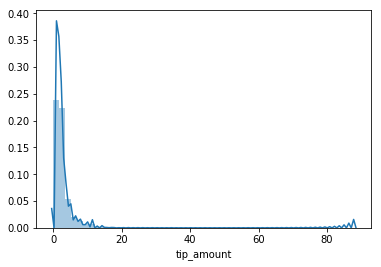

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.distplot(results_df.tip_amount)

In [12]:
results_df.dropoff_datetime = pd.to_datetime(results_df.dropoff_datetime)

In [14]:
results_df.pickup_datetime = pd.to_datetime(results_df.pickup_datetime)

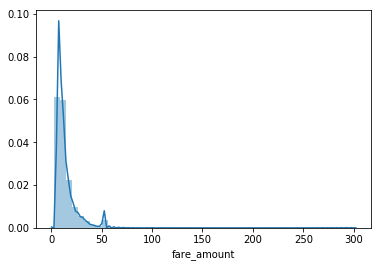

In [15]:
sns.distplot(results_df.fare_amount)

In [18]:
results1 = results_df.set_index('dropoff_datetime')
results1.resample('M').mean()

,dropoff_latitude,dropoff_longitude,fare_amount,imp_surcharge,mta_tax,passenger_count,pickup_latitude,pickup_longitude,rate_code,tip_amount,tolls_amount,total_amount,trip_distance
dropoff_datetime,,,,,,,,,,,,,
2014-01-31,40.097470,-72.790757,12.625532,0.327127,0.498701,1.671141,40.088069,-72.775635,1.034423,2.611407,0.282150,16.345776,3.003678
2014-02-28,40.090177,-72.778086,12.498624,0.325838,0.497864,1.667641,40.072429,-72.746703,1.034180,2.544093,0.268253,16.136229,2.904452
2014-03-31,40.052036,-72.709445,12.898144,0.333114,0.497838,1.679015,40.052483,-72.711277,1.038548,2.640190,0.308108,16.678138,3.083086
2014-04-30,39.978689,-72.581132,13.014390,0.335768,0.497667,1.653479,40.005932,-72.625094,1.038344,2.641264,0.331613,16.820903,3.088791
2014-05-31,39.868215,-72.373773,13.352174,0.315266,0.498744,1.656425,39.844335,-72.332421,1.032271,2.672895,0.334786,17.174823,3.152301
2014-06-30,39.634102,-71.950551,13.559467,0.328598,0.496993,1.663418,39.566120,-71.827344,1.039195,2.730610,0.367482,17.484384,3.223285
2014-07-31,39.823517,-72.293425,13.202773,0.337122,0.498409,1.645374,39.776586,-72.209666,1.033644,2.670384,0.317920,17.026608,3.201014
2014-08-31,39.943177,-72.512889,13.261599,0.338317,0.497709,1.663371,39.825056,-72.299971,1.036653,2.622636,0.311177,17.031437,3.203253
2014-09-30,40.088718,-72.777824,13.538130,0.325614,0.497307,1.639380,40.057252,-72.715414,1.043731,2.725418,0.296997,17.383466,3.123169


(0, 20)

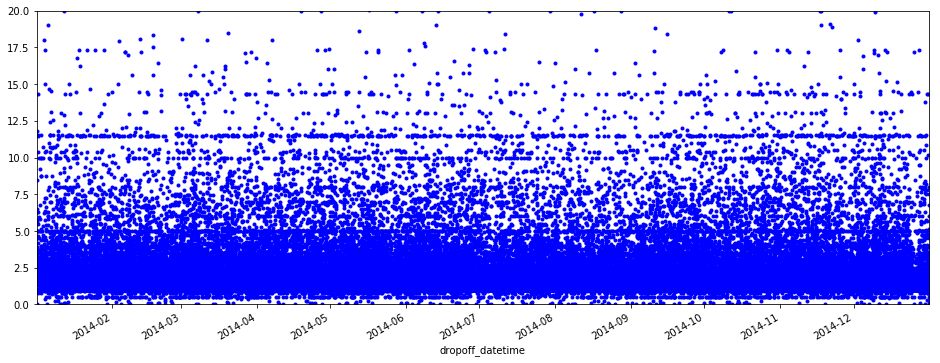

In [24]:
results1.tip_amount.plot(figsize = (16,6), style='.b')
plt.ylim(0, 20)

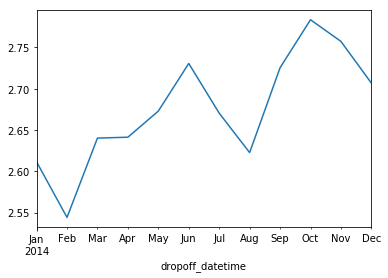

In [25]:
results1.resample('M').mean().tip_amount.plot()

In [26]:
_

In [27]:
df_2015.head()

,dropoff_datetime,dropoff_latitude,dropoff_longitude,extra,fare_amount,mta_tax,passenger_count,payment_type,pickup_datetime,pickup_latitude,pickup_longitude,rate_code,store_and_fwd_flag,tip_amount,tolls_amount,total_amount,trip_distance,vendor_id
0,2015-02-03T20:36:37.000,40.770320892333984,-73.9600830078125,0.5,5.5,0.5,1,1,2015-02-03T20:31:31.000,40.763118743896484,-73.971817016601563,1,N,1.7,0,8.5,1.03,2
1,2015-01-27T20:03:24.000,40.683986663818359,-73.950706481933594,1,17.5,0.5,1,2,2015-01-27T19:43:22.000,40.731906890869141,-73.985336303710938,1,N,0,0,19.3,4.8,1
2,2015-06-11T15:11:24.000,40.782260894775391,-73.951461791992188,0,9.5,0.5,2,1,2015-06-11T14:59:52.000,40.786319732666016,-73.972412109375,1,N,2.06,0,12.36,1.65,2
3,2015-03-06T07:37:46.000,40.774150848388672,-73.871040344238281,0,31,0.5,1,1,2015-03-06T07:12:13.000,40.706840515136719,-74.005279541015625,1,N,5.5,0,37.3,10.51,2
4,2015-02-13T19:37:11.000,40.757961273193359,-73.975479125976562,1,9.5,0.5,1,1,2015-02-13T19:24:13.000,40.749069213867188,-73.992500305175781,1,N,2.26,0,13.56,1.44,2
